In [3]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt



In [4]:


pathToModel = "C:\\Users\\ilmar\\OneDrive\\Python\\Nose detector\\runs\\detect\\train12\\weights\\best.torchscript"
model = YOLO(pathToModel)

Loading C:\Users\ilmar\OneDrive\Python\Nose detector\runs\detect\train12\weights\best.torchscript for TorchScript inference...

image 1/1 C:\Users\ilmar\OneDrive\Pictures\Kameran kuvat\WIN_20250305_11_00_00_Pro.jpg: 640x640 1 Nose, 244.1ms
Speed: 3.9ms preprocess, 244.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
1 label saved to runs\detect\predict9\labels
(720, 1280, 3)


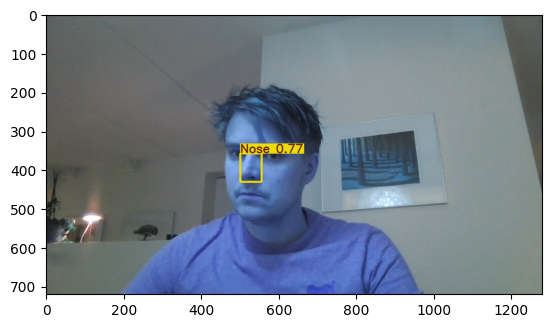

In [5]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook


path = "C:\\Users\\ilmar\\OneDrive\\Pictures\\Kameran kuvat\\"


imgPath= path + "WIN_20250305_11_00_00_Pro.jpg"
res = model.predict(source = imgPath, save=True, save_txt=True, conf= 0.25)

annotated_frame = res[0].plot()
print(annotated_frame.shape)
# cv2.imshow("YOLO8 Tracking", annotated_frame)
plt.imshow(annotated_frame)
plt.show()


In [23]:
import cv2
import NoseDetection
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator  # ultralytics.yolo.utils.plotting is deprecated


class NoseDetector:
    def __init__(self):
        self.cameraInstance = None
    def capture(self):
        self.cameraInstance = cv2.VideoCapture(0)
        return self.cameraInstance
ND = NoseDetector()
cam = ND.capture()
while True:
    ret, frame = cam.read()
    # Grayscale conversion
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    results = model.predict(frame, conf= 0.55)

    for r in results:
        annotator = Annotator(frame)

        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0]
            c = box.cls
            if model.names[int(c)] == "Nose":
                annotator.box_label(b, model.names[int(c)])
    img = annotator.result()
    

    # Nose detection

    cv2.imshow("Camera", img)

    if cv2.waitKey(1) == ord("q"):
        break
cam.release()
cv2.destroyAllWindows()


0: 640x640 2 Eyes, 1 Nose, 61.8ms
Speed: 3.0ms preprocess, 61.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
2 labels saved to runs\detect\predict9\labels

0: 640x640 2 Eyes, 1 Nose, 63.5ms
Speed: 3.7ms preprocess, 63.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
2 labels saved to runs\detect\predict9\labels

0: 640x640 2 Eyes, 1 Nose, 60.5ms
Speed: 2.0ms preprocess, 60.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
2 labels saved to runs\detect\predict9\labels

0: 640x640 2 Eyes, 1 Nose, 55.5ms
Speed: 2.3ms preprocess, 55.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
2 labels saved to runs\detect\predict9\labels

0: 640x640 2 Eyes, 1 Nose, 53.8ms
Speed: 2.9ms preprocess, 53.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Resu

In [24]:
cam.release()